# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: **Grade 4 Reading**

How many years of data are logged in our dataset? 

In [4]:
# @@@ 1

# Takes the difference of the most recent year and the earliest year.
print(f"{df["YEAR"].max() - df["YEAR"].min()} Years")

33 Years


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
# @@@ 2

# Finds the average reading score across all years in each state, then takes the maximum of the two.
# Prints the name of the state that corresponds to the maximum average reading score between Michigan and Ohio.
# mi_oh_max = max(df[df["STATE"] == "MICHIGAN"]["AVG_READING_4_SCORE"].max(), df[df["STATE"] == "OHIO"]["AVG_READING_4_SCORE"].max())
# #mi_oh_max = df[df["STATE"] == "MICHIGAN"]["AVG_READING_4_SCORE"].max() df[df["STATE"] == "OHIO"]["AVG_READING_4_SCORE"].max()

# # might get rid of mean
# row_index = df.index[df["AVG_READING_4_SCORE"] == mi_oh_max]
# state_name = df.loc[row_index, "STATE"]
# print(state_name)

#print(df.iloc(df.index(df.groupby("STATE")["AVG_READING_4_SCORE"].mean() == mi_oh_max), "STATE"))

if df[df["STATE"] == "MICHIGAN"]["AVG_READING_4_SCORE"].max() > df[df["STATE"] == "OHIO"]["AVG_READING_4_SCORE"].max():
    print("MICHIGAN")
else:
    print("OHIO")


OHIO


Find the average for your chosen test across all states in 2019

In [6]:
# @@@ 3

print(df.groupby("STATE")["AVG_READING_4_SCORE"].mean())


STATE
ALABAMA                 212.615385
ALASKA                  209.888889
ARIZONA                 210.230769
ARKANSAS                214.692308
CALIFORNIA              208.230769
COLORADO                222.666667
CONNECTICUT             227.000000
DELAWARE                220.384615
DISTRICT_OF_COLUMBIA    197.000000
DODEA                   228.636364
FLORIDA                 219.384615
GEORGIA                 216.230769
HAWAII                  210.153846
IDAHO                   221.000000
ILLINOIS                218.666667
INDIANA                 222.250000
IOWA                    222.538462
KANSAS                  222.000000
KENTUCKY                220.846154
LOUISIANA               207.230769
MAINE                   224.384615
MARYLAND                220.846154
MASSACHUSETTS           231.230769
MICHIGAN                217.833333
MINNESOTA               222.923077
MISSISSIPPI             207.769231
MISSOURI                220.538462
MONTANA                 224.000000
NATIONAL      

For each state, find a maximum value for your chosen test score

In [7]:
# @@@ 4

print(df.groupby("STATE")["AVG_READING_4_SCORE"].max())

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
# @@@ 5

df["EXPENDITURE_PER_STUDENT"] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']
print(df.groupby("STATE")["EXPENDITURE_PER_STUDENT"].mean())

STATE
ALABAMA                  4.063358
ALASKA                   6.947033
ARIZONA                  3.460212
ARKANSAS                 4.193839
CALIFORNIA               4.710910
COLORADO                 4.239810
CONNECTICUT              7.877906
DELAWARE                 6.442017
DISTRICT_OF_COLUMBIA     7.798537
DODEA                         NaN
FLORIDA                  4.193982
GEORGIA                  4.785081
HAWAII                   5.478353
IDAHO                    3.571177
ILLINOIS                 5.434921
INDIANA                  4.698631
IOWA                     4.848781
KANSAS                   4.664548
KENTUCKY                 4.293763
LOUISIANA                4.528991
MAINE                    6.133973
MARYLAND                 6.221156
MASSACHUSETTS            7.368227
MICHIGAN                 5.227618
MINNESOTA                5.650056
MISSISSIPPI              3.674854
MISSOURI                 4.579931
MONTANA                  4.886555
NATIONAL                      NaN
NEBRASKA

Feature engineering justification: **I made this feature because the amount of funding that a state is allocating to students, and its relation to student density, could inform a lot about what we observe in student performance.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

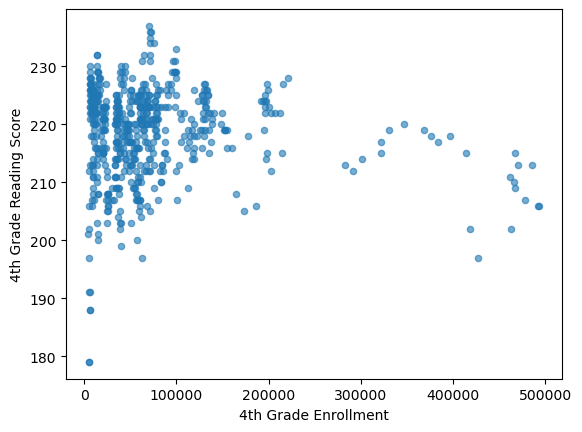

In [25]:
# @@@ 6

df.plot.scatter(x='GRADES_4_G', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Enrollment')
plt.ylabel('4th Grade Reading Score')

**Visualization 2**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='AVG_READING_4_SCORE'>

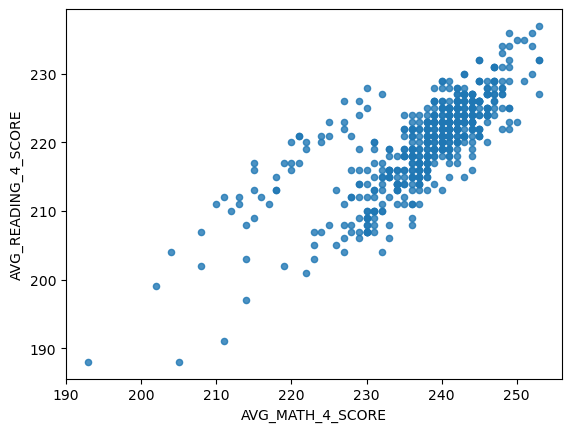

In [22]:
# @@@ 7

df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_READING_4_SCORE', alpha=0.8)

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# @@@ 8

# Light data cleaning to prepare for data training and testing.
X = df[['GRADES_4_G','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.median(), inplace=True)


In [13]:
# @@@ 9 

# 70/30 Training
X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [14]:
# @@@ 10
# imported sklearn class here
from sklearn.linear_model import LinearRegression


In [15]:
# @@@ 11
# created model here
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [18]:
# @@@ 12

# In Order: R^2 value, mean error, mean absolute error, and root mean squared error
print(model.score(X_test, y_test),
      np.mean(model.predict(X_test)-y_test),
      np.mean(np.abs(model.predict(X_test)-y_test)),
      np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.5529914226332022 -0.3114538370500551 3.613101474375604 4.719069260000951


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

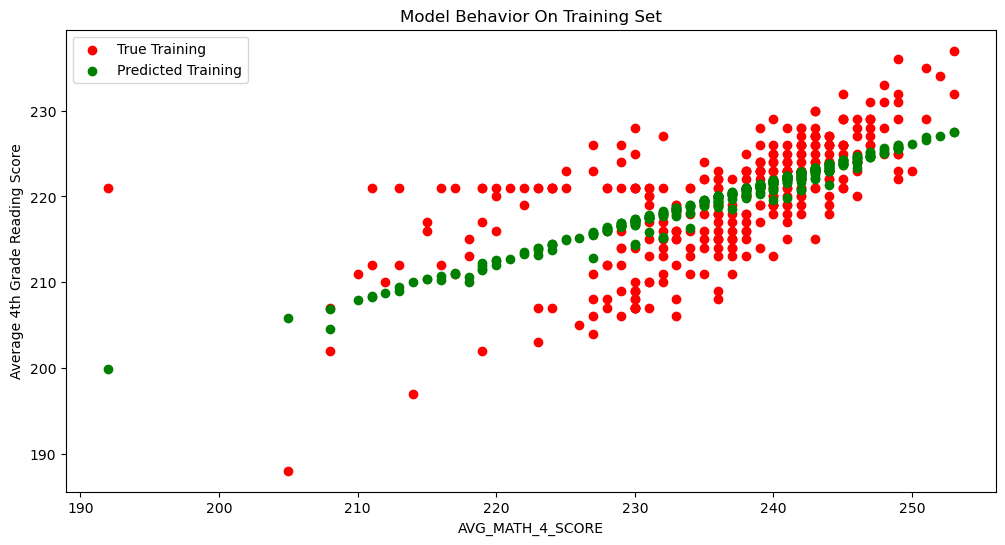

In [19]:
# @@@ 13

col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 4th Grade Reading Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

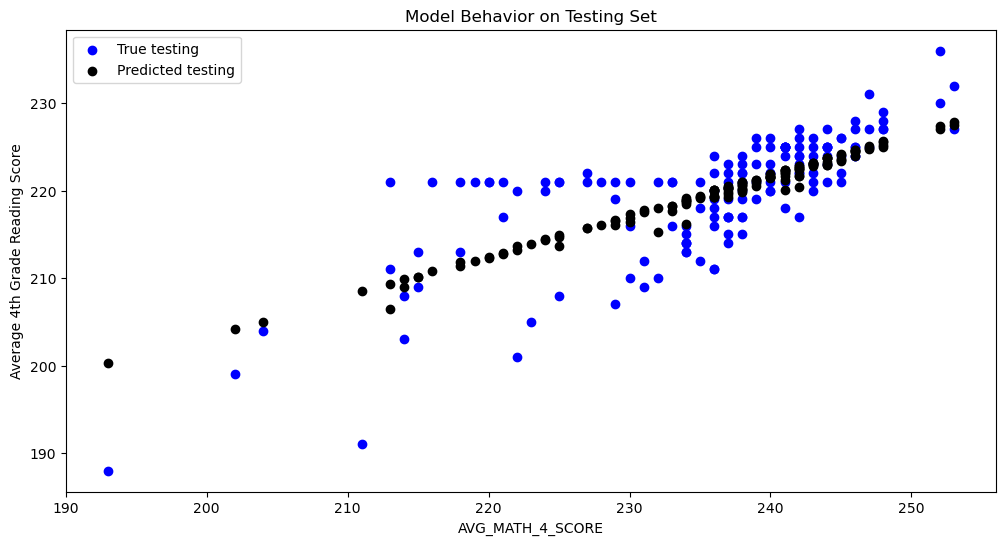

In [20]:
# @@@ 14

col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average 4th Grade Reading Score')
plt.title("Model Behavior on Testing Set")